# Simple Linear Regression

## Main Idea

The main idea of linear regression is:
- Use least-squares to fit a line to the data
- Calculate R^2

In [1]:
# Dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Data Sourcing

In [2]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# For simplicity, we will do linear regression with less data
X = X[["MedInc"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=True)

print(pd.concat([X_train, y_train], axis=1).head())

   MedInc  MedHouseVal
0  8.3252        4.526
1  8.3014        3.585
2  7.2574        3.521
3  5.6431        3.413
4  3.8462        3.422


## Linear Regression And Linear Algebra

The equation between feature and its target can be written as

$\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \mathbf{\epsilon}$

Where:
- $\mathbf{y}$ is the vector of observed values of the dependent variable $y$
- $\mathbf{X}$ is the feature matrix, which includes the feature values
- $\boldsymbol{\beta}$ is the vector of coefficients, which includes $\beta_0$ and $\beta_1$
- $\mathbf{\epsilon}$ is the vector of residuals (error)

To have a more practical view, if we write each matrices and vectors, it will be

$\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} 
= \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & 1 & x_n \end{bmatrix} 
\begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix}
+ \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n \end{bmatrix}$

To calculate $\boldsymbol{\beta}$, we can do

$\boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

Calculate $\mathbf{X}^T$ (transpose of $\mathbf{X}$)

In [3]:
X_np = X_train.to_numpy()
X_np = np.hstack([np.ones((len(X_np), 1)), X_np])

print(X_np)

# transpose of X
XT_np = np.matrix.transpose(X_np)

# print(XT_np)

[[1.     8.3252]
 [1.     8.3014]
 [1.     7.2574]
 ...
 [1.     3.3021]
 [1.     2.25  ]
 [1.     2.7303]]


Calculate $\mathbf{X}^T \mathbf{X}$

In [4]:
# multiplication of XT and X
XT_X_np = np.linalg.matmul(XT_np, X_np)

# print(XT_X_np)

Calcualte $(\mathbf{X}^T \mathbf{X})^{-1}$

In [5]:
# inverse of multiplication of XT and X
XT_X_inv_np = np.linalg.inv(XT_X_np)

# print(XT_X_inv_np)

Calculate $\mathbf{X}^T \mathbf{y}$

In [6]:
y_np = y_train.to_numpy()

# multiplication of XT and y
XT_y_np = np.matmul(XT_np, y_np)

# print(XT_y_np)

Finally, calculate $\boldsymbol{\beta}$

In [7]:
B_np = np.matmul(XT_X_inv_np, XT_y_np)

print(B_np)

[0.45203504 0.4178011 ]


## $TSS$, $RSS$, $MSE$, and $R^2$

First, we need to calculate the predicted $y$

$y = \beta_0 + \beta_1x$

In [8]:
def predict(X):
    return B_np[0] + (B_np[1]*X)

y_pred = X_test.apply(predict)

# convert to pd.Series
y_pred = y_pred.iloc[:, 0]

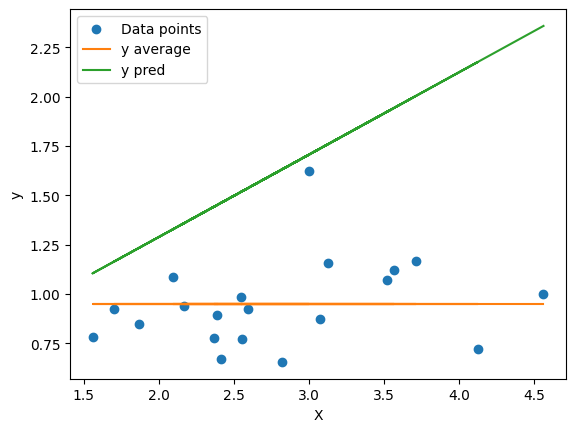

In [9]:
fig, (ax) = plt.subplots()

ax.scatter(X_test, y_test, label="Data points")
ax.plot(X_test, pd.Series([y_test.mean()] * len(y_test)), label="y average", color="tab:orange")
ax.plot(X_test, y_pred, label="y pred", color="tab:green")
ax.set(xlabel="X", ylabel="y")
ax.legend()

plt.show()

To calculate $R^2$, we must calculate total sum of squares ($TSS$) and residual sum of squares ($RSS$)

$TSS = \sum_{i=1}^{n} (y_i - \bar{y})^2$

$RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

$R^2 = 1 - \frac{RSS}{TSS}$

In addition, we will also calculate $MSE$ for the sake of benchmarking with scikit-learn

$MSE = \frac{RSS}{n}$

Calculate $TSS$

In [10]:
tss = 0

for v in y_test:
    tss = tss + (v - y_test.mean())**2

print(tss)

0.94155055


Calculate $RSS$

In [11]:
rss = 0

for (_, v_test), (_, v_pred) in zip(y_test.items(), y_pred.items()):
    rss = rss + (v_test - v_pred)**2

print(rss)

11.274677735165556


Calculate $R^2$

In [12]:
r_squared = 1 - (rss/tss)

print(f"R^2: {r_squared}")
print(f"R^2 (sklearn.metrics): {r2_score(y_test, y_pred)}")

R^2: -10.974585682272243
R^2 (sklearn.metrics): -10.974585682272243


Calculate $MSE$

In [13]:
mse = rss / len(y_test)

print(f"MSE: {mse}")
print(f"MSE (sklearn.metrics): {mean_squared_error(y_test, y_pred)}")

20620    1.000
20621    0.775
20622    0.670
20623    0.655
20624    0.872
20625    0.720
20626    0.938
20627    1.625
20628    0.924
20629    1.083
20630    1.120
20631    1.072
20632    1.156
20633    0.983
20634    1.168
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, dtype: float64
20620    2.358253
20621    1.440594
20622    1.461735
20623    1.631696
20624    1.736314
20625    2.175465
20626    1.357285
20627    1.705438
20628    1.536312
20629    1.327036
20630    1.942457
20631    1.921818
20632    1.757663
20633    1.517219
20634    2.003122
20635    1.103930
20636    1.520269
20637    1.162297
20638    1.232153
20639    1.449995
Name: MedInc, dtype: float64
MSE: 0.5637338867582777
MSE (sklearn.metrics): 0.5637338867582777


## Comparing With scikit-learn's LinearRegression()

In [14]:
regressor = LinearRegression().fit(X_train, y_train)

y_pred_sklearn = regressor.predict(X_test)

print(f"R^2 (sklearn.linear_model.LinearRegression): {r2_score(y_test, y_pred_sklearn)}")
print(f"MSE (sklearn.linear_model.LinearRegression): {mean_squared_error(y_test, y_pred_sklearn)}")

R^2 (sklearn.linear_model.LinearRegression): -10.974585682272476
MSE (sklearn.linear_model.LinearRegression): 0.5637338867582887
